In [84]:
import ROOT as r
import math
import array
import os
import sys
import matplotlib.pyplot as plt
import numpy as np

#______________Add include directory_______________
current_dir = os.getcwd()
include_dir = os.path.join(current_dir, '../include')
sys.path.insert(0, include_dir)
#__________________________________________________

import CONFIG
import DBPARSE
from UTILITIES import *
from SIMFITS import DistributionFits
from ROOT import gStyle, TChain, TH1F, TCanvas, TLegend


from joblib import Parallel, delayed

In [197]:
pas="1"
config="3"

# Current cuts

In [86]:
W2min=CONFIG.Function_JSON("W2min",f"../config/cuts{config}.cfg")
W2max=CONFIG.Function_JSON("W2max",f"../config/cuts{config}.cfg")
dxmin=CONFIG.Function_JSON("dxmin",f"../config/cuts{config}.cfg")
dxmax=CONFIG.Function_JSON("dxmax",f"../config/cuts{config}.cfg")
dymin=CONFIG.Function_JSON("dymin",f"../config/cuts{config}.cfg")
dymax=CONFIG.Function_JSON("dymax",f"../config/cuts{config}.cfg")
dybgmin=CONFIG.Function_JSON("dybgmin",f"../config/cuts{config}.cfg")
dybgmax=CONFIG.Function_JSON("dybgmax",f"../config/cuts{config}.cfg")
coinmin=CONFIG.Function_JSON("coinmin",f"../config/cuts{config}.cfg")
coinmax=CONFIG.Function_JSON("coinmax",f"../config/cuts{config}.cfg")

print(f'W2min: {W2min}')
print(f'W2max: {W2max}')
print(f'dxmin: {dxmin}')
print(f'dxmax: {dxmax}')
print(f'dymin: {dymin}')
print(f'dymax: {dymax}')
print(f'dybgmin: {dybgmin}')
print(f'dybgmax: {dybgmax}')
print(f'Coin Min: {coinmin} Coin Max: {coinmax}')

W2min: 0
W2max: 1.35
dxmin: -0.481
dxmax: 0.498
dymin: -0.822
dymax: 1.155
dybgmin: -1.4
dybgmax: 1.4
Coin Min: 91 Coin Max: 109


# Load the root file

In [5]:
fileDIR=(f"../outfiles/Pass1/QE_data_GEN{config}_sbs100p_nucleon_np_model2.root")
resolved_path = os.path.abspath(fileDIR)
print(f"Resolved Path: {resolved_path}")
print(f"File Exists: {os.path.exists(resolved_path)}")


r.gErrorIgnoreLevel = r.kError  # Suppress Info and Warning messages

r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1)


rootfilenp = f"../outfiles/Pass1/QE_data_GEN{config}_sbs100p_nucleon_np_model2.root"
rootfilep = f"../outfiles/Pass1/QE_sim_GEN{config}_sbs100p_nucleon_np_model2.root"


B = r.TChain("Tout")
C = r.TChain("Tout")
#_________________________________________Define Variables
dx_np = array.array('d', [0])
fnucl = array.array('d', [0])

dx_p = array.array('d', [0])
dy_np = array.array('d', [0])
dy_p = array.array('d', [0])
W2_np = array.array('d', [0])
W2_p = array.array('d', [0])
coin_np = array.array('d', [0])
weight = array.array('d', [0])
helicity_p = array.array('i', [0])
IHWP_p = array.array('i', [0])
runnum_p = array.array('i', [0])
helicity_np = array.array('i', [0])
IHWP_np = array.array('i', [0])
runnum_np = array.array('i', [0])
#_________________________________________Define Variables

C.Add(rootfilenp)
B.Add(rootfilep)
C.SetBranchStatus("*", 0)
B.SetBranchStatus("*", 0)
branches = ["dx", "dy", "W2", "helicity", "IHWP", "runnum", "coinCut", "coin_time"]
b2=["dx", "dy", "W2","fnucl"]
for branch in branches:
    C.SetBranchStatus(branch, 1)
for branch in b2:
    B.SetBranchStatus(branch, 1)
B.SetBranchStatus("weight", 1)
C.SetBranchAddress("dx", dx_np)
B.SetBranchAddress("dx", dx_p)
C.SetBranchAddress("dy", dy_np)
B.SetBranchAddress("dy", dy_p)
C.SetBranchAddress("W2", W2_np)
B.SetBranchAddress("W2", W2_p)
C.SetBranchAddress("helicity", helicity_np)
C.SetBranchAddress("IHWP", IHWP_np)
C.SetBranchAddress("coin_time", coin_np)
C.SetBranchAddress("runnum", runnum_np)
B.SetBranchAddress("weight", weight)
B.SetBranchAddress("fnucl", fnucl)




nEntries_np = C.GetEntries()
nEntries_p = B.GetEntries()



Resolved Path: /home/research/GEn/GEn Data Analysis/outfiles/Pass1/QE_data_GEN2_sbs100p_nucleon_np_model2.root
File Exists: True


Error in <THashList::Delete>: A list is accessing an object (0x9fc6c00) already deleted (list name = THashList)


# W2

#### Start by checking statistics in a dx, dy, coin cut with varying W2

In [96]:
granularity=50 # number of increments in W2
W2top=2
scaler = np.arange(1,granularity)
W2array=np.empty(0)
for i in range(0,len(scaler)):
    W2array=np.append(W2array,W2top*scaler[i]/len(scaler))
    
def W2varyingFunc(W2Value):
    
   # fileDIR=(f"../outfiles/Pass1/QE_data_GEN{config}_sbs100p_nucleon_np_model2.root")
    #resolved_path = os.path.abspath(fileDIR)
    #print(f"Resolved Path: {resolved_path}")
    #print(f"File Exists: {os.path.exists(resolved_path)}")


    r.gErrorIgnoreLevel = r.kError  # Suppress Info and Warning messages

    r.gStyle.SetOptStat(0)
    r.gStyle.SetOptFit(1)


    rootfilenp = f"../outfiles/Pass1/QE_data_GEN{config}_sbs100p_nucleon_np_model2.root"
    rootfilep = f"../outfiles/Pass1/QE_sim_GEN{config}_sbs100p_nucleon_np_model2.root"


    B = r.TChain("Tout")
    C = r.TChain("Tout")
    #_________________________________________Define Variables
    dx_np = array.array('d', [0])
    fnucl = array.array('d', [0])

    dx_p = array.array('d', [0])
    dy_np = array.array('d', [0])
    dy_p = array.array('d', [0])
    W2_np = array.array('d', [0])
    W2_p = array.array('d', [0])
    coin_np = array.array('d', [0])
    weight = array.array('d', [0])
    helicity_p = array.array('i', [0])
    IHWP_p = array.array('i', [0])
    runnum_p = array.array('i', [0])
    helicity_np = array.array('i', [0])
    IHWP_np = array.array('i', [0])
    runnum_np = array.array('i', [0])
    #_________________________________________Define Variables

    C.Add(rootfilenp)
    B.Add(rootfilep)
    C.SetBranchStatus("*", 0)
    B.SetBranchStatus("*", 0)
    branches = ["dx", "dy", "W2", "helicity", "IHWP", "runnum", "coinCut", "coin_time"]
    b2=["dx", "dy", "W2","fnucl"]
    for branch in branches:
        C.SetBranchStatus(branch, 1)
    for branch in b2:
        B.SetBranchStatus(branch, 1)
    B.SetBranchStatus("weight", 1)
    C.SetBranchAddress("dx", dx_np)
    B.SetBranchAddress("dx", dx_p)
    C.SetBranchAddress("dy", dy_np)
    B.SetBranchAddress("dy", dy_p)
    C.SetBranchAddress("W2", W2_np)
    B.SetBranchAddress("W2", W2_p)
    C.SetBranchAddress("helicity", helicity_np)
    C.SetBranchAddress("IHWP", IHWP_np)
    C.SetBranchAddress("coin_time", coin_np)
    C.SetBranchAddress("runnum", runnum_np)
    B.SetBranchAddress("weight", weight)
    B.SetBranchAddress("fnucl", fnucl)




    nEntries_np = C.GetEntries()
    nEntries_p = B.GetEntries()
    counts=0
    for i in range(nEntries_np):
        C.GetEntry(i)
        if IHWP_np[0] == 1:
            helicity_np[0] *= -1
        elif IHWP_np[0] == -1:
            helicity_np[0] *= 1
        else:
            continue
        #____________CUTS_______________________________      
        ycut = dymin < dy_np[0] < dymax
        bgycut=dybgmin<dy_np[0]<dybgmax
        coin_cut = coinmin < coin_np[0] < coinmax
        W2cut=W2min < W2_np[0] < W2Value
        xcutn = dxmin < dx_np[0] < dxmax
        #________________________________________________ 
        if coin_cut and W2cut and runnum_np[0] > 2165 and ycut:
            counts+=1
    print(f'Loop Completed')
    return W2Value, counts

    

n_jobs = -1  # Use all available CPU cores
results = Parallel(n_jobs=n_jobs)(delayed(W2varyingFunc)(W2Value) for (W2Value) in W2array)
r=np.transpose(results)

KeyboardInterrupt: 

Error in <TList::Clear>: A list is accessing an object (0x66ae4f0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x66ae9c0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x66aec00) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x66e0ee0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x66e1250) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x66e15c0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x66e1a20) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x6a0ba00) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x6a0be10) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x6a0c220) alread

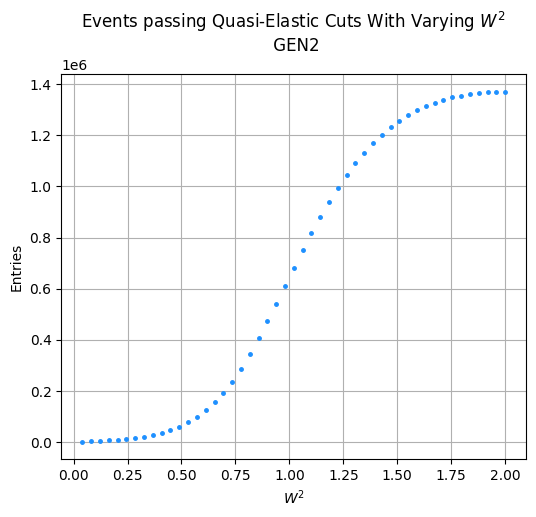

In [29]:
plt.figure(figsize=(6,5))
plt.plot(r[0],r[1],'.',color='dodgerblue',markersize=5)
plt.title(f"Events passing Quasi-Elastic Cuts With Varying $W^2$ \n GEN{config}")
plt.ylabel("Entries")
plt.xlabel("$W^2$")
plt.grid()
plt.savefig("../plots/cutselection/VaryW2.png")
np.save(f'CutSelectionArrays/Pass{pas}/VaryW2_W2{config}.npy',r[0])
np.save(f'CutSelectionArrays/Pass{pas}/VaryW2_Y{config}.npy',r[1])



# $\Delta X$

# $\Delta Y$

# $\Delta Y$ Background

# Binning

#### Its important to choose the proper bin size such that data clarity isn't being lost, and  also the fractions are well determined, so we write a function which calculates the fractions of background and neutron sim peak to data for various # of bins. Next we complete a # of bins vs $\chi^2$

In [274]:
#_____________Cuts____________________
W2min=CONFIG.Function_JSON("W2min",f"../config/cuts{config}.cfg")
W2max=CONFIG.Function_JSON("W2max",f"../config/cuts{config}.cfg")
dxmin=CONFIG.Function_JSON("dxmin",f"../config/cuts{config}.cfg")
dxmax=CONFIG.Function_JSON("dxmax",f"../config/cuts{config}.cfg")
dymin=CONFIG.Function_JSON("dymin",f"../config/cuts{config}.cfg")
dymax=CONFIG.Function_JSON("dymax",f"../config/cuts{config}.cfg")
dybgmin=CONFIG.Function_JSON("dybgmin",f"../config/cuts{config}.cfg")
dybgmax=CONFIG.Function_JSON("dybgmax",f"../config/cuts{config}.cfg")
coinmin=CONFIG.Function_JSON("coinmin",f"../config/cuts{config}.cfg")
coinmax=CONFIG.Function_JSON("coinmax",f"../config/cuts{config}.cfg")


nbins_start=50
nbins_top=2000
nbins_array=np.arange(nbins_start,nbins_top,5).astype(int)

In [275]:
def CalculateNBins(nbins_value,config):
    
    W2min=CONFIG.Function_JSON("W2min",f"../config/cuts{config}.cfg")
    W2max=CONFIG.Function_JSON("W2max",f"../config/cuts{config}.cfg")
    dxmin=CONFIG.Function_JSON("dxmin",f"../config/cuts{config}.cfg")
    dxmax=CONFIG.Function_JSON("dxmax",f"../config/cuts{config}.cfg")
    dymin=CONFIG.Function_JSON("dymin",f"../config/cuts{config}.cfg")
    dymax=CONFIG.Function_JSON("dymax",f"../config/cuts{config}.cfg")
    dybgmin=CONFIG.Function_JSON("dybgmin",f"../config/cuts{config}.cfg")
    dybgmax=CONFIG.Function_JSON("dybgmax",f"../config/cuts{config}.cfg")
    coinmin=CONFIG.Function_JSON("coinmin",f"../config/cuts{config}.cfg")
    coinmax=CONFIG.Function_JSON("coinmax",f"../config/cuts{config}.cfg")
#=========================================standard root stuff================================================    
    r.gErrorIgnoreLevel = r.kError  # Suppress Info and Warning messages
    gStyle.SetOptStat(0)
    gStyle.SetOptFit(1)

    rootfilenp = (f"../outfiles/Pass1/QE_data_GEN{config}_sbs100p_nucleon_np_model2.root")
    rootfilep = (f"../outfiles/Pass1/QE_sim_GEN{config}_sbs100p_nucleon_np_model2.root")
    if config == "4":
        config = "4b"
    
    C = TChain("Tout")
    B = TChain("Tout")
    
    C.Add(rootfilenp)
    B.Add(rootfilep)

    dx_p, dy_p, W2_p, coin_p,fnucl  = array.array('d', [0]),array.array('d', [0]), array.array('d', [0]), array.array('d', [0]), array.array('d', [0])
    dx_np, dy_np, W2_np, coin_np, weight = array.array('d', [0]), array.array('d', [0]), array.array('d', [0]), array.array('d', [0]), array.array('d', [0])
    helicity_p, IHWP_p, runnum_p = array.array('i', [0]), array.array('i', [0]), array.array('i', [0])
    helicity_np, IHWP_np, runnum_np= array.array('i', [0]), array.array('i', [0]), array.array('i', [0])
    
    # Disable all branches initially
    C.SetBranchStatus("*", 0)
    B.SetBranchStatus("*", 0)

    # Enable specific branches
    branches = ["dx", "dy", "W2", "helicity", "IHWP", "runnum", "coinCut", "coin_time"]
    b2=["dx", "dy", "W2"]
    for branch in branches:
        C.SetBranchStatus(branch, 1)
    for branch in b2:
        B.SetBranchStatus(branch, 1)

    B.SetBranchStatus("weight", 1)
    B.SetBranchStatus("fnucl",1)
    # Set branch addresses
    C.SetBranchAddress("dx", dx_np)
    B.SetBranchAddress("dx", dx_p)
    C.SetBranchAddress("dy", dy_np)
    B.SetBranchAddress("dy", dy_p)
    C.SetBranchAddress("W2", W2_np)
    B.SetBranchAddress("W2", W2_p)
    C.SetBranchAddress("helicity", helicity_np)
    #B.SetBranchAddress("helicity", helicity_p)
    C.SetBranchAddress("IHWP", IHWP_np)
    #B.SetBranchAddress("IHWP", IHWP_p)
    C.SetBranchAddress("coin_time", coin_np)
    #B.SetBranchAddress("coin_time", coin_pp)
    C.SetBranchAddress("runnum", runnum_np)
    #B.SetBranchAddress("runnum", runnum_p)
    B.SetBranchAddress("weight", weight)
    B.SetBranchAddress("fnucl", fnucl)
    
    # Assuming the variables are already defined or loaded from the ROOT file
    nbins=nbins_value
    xmin, xmax = -4, 2.5
    if config=="2":
        xmin=-5.5
        xmax=2.8
    
    hdx_total_data = TH1F("hdx_total_data", "#Deltax;#Deltax;Entries", nbins, xmin, xmax)
    hdx_total_sim = TH1F("hdx_total_sim", "#Deltax;#Deltax;Entries", 100, -6, 4)
    hdx_p = TH1F("hdx_p", "#Deltax for helicity +1;#Deltax;Entries", 100, -6, 4)
    hdx_m = TH1F("hdx_m", "#Deltax for helicity -1;#Deltax;Entries", 100, -6, 4)
    
    hdx_data_plus = TH1F("hdx_data_plus", "", nbins, xmin, xmax)
    hdx_data_minus = TH1F("hdx_data_minus", "", nbins, xmin, xmax)
    hdx_sim_p = TH1F("hdx_sim_p", "", nbins, xmin, xmax)
    hdx_sim_n = TH1F("hdx_sim_n", "", nbins, xmin, xmax)
    hdx_bg_data = TH1F("hdx_bg_data", "", nbins, xmin, xmax)
    hdx_bg_data_plus = TH1F("hdx_bg_data_plus", "", nbins, xmin, xmax)
    hdx_bg_data_minus = TH1F("hdx_bg_data_minus", "", nbins, xmin, xmax)
 #====================================================================================================   

    nEntries_np = C.GetEntries()
    for i in range(nEntries_np):
        C.GetEntry(i)
        if IHWP_np[0] == 1:
            helicity_np[0] *= -1
        elif IHWP_np[0] == -1:
            helicity_np[0] *= 1
        else:
            continue
#____________CUTS_______________________________      
        ycut = dymin < dy_np[0] < dymax
        bgycut=dybgmin<dy_np[0]<dybgmax
        coin_cut = coinmin < coin_np[0] < coinmax
        W2cut=W2min < W2_np[0] < W2max
#________________________________________________     
        if coin_cut and W2cut and runnum_np[0] > 2165 and not bgycut:
            hdx_bg_data.Fill(dx_np[0])
            if helicity_np[0] == 1:
                hdx_bg_data_plus.Fill(dx_np[0])
            if helicity_np[0] == -1:
                hdx_bg_data_minus.Fill(dx_np[0])
        
        if coin_cut and W2cut and runnum_np[0] > 2165 and ycut:
            hdx_total_data.Fill(dx_np[0])
            if helicity_np[0] == 1:
                hdx_data_plus.Fill(dx_np[0])
            if helicity_np[0] == -1:
                hdx_data_minus.Fill(dx_np[0])
    
    # Simulation loop
    nEntries_p = B.GetEntries()
    
    for i in range(nEntries_p):
        B.GetEntry(i)
           
        #____________CUTS_______________________________      
        ycut = dymin < dy_p[0] < dymax
        W2cut=W2min < W2_p[0] < W2max
        #________________________________________________ 

        if W2cut and ycut and fnucl[0]==1:
            hdx_sim_p.Fill(dx_p[0], weight[0])
        if W2cut and ycut and fnucl[0]==0:
            hdx_sim_n.Fill(dx_p[0], weight[0])
    
    

    # Fit distributions
    cfg = f"GEN{config}"
    dists = DistributionFits(bg_shape_option="pol2" if cfg == "GEN2" else "from data")
    dists.hdx_data = (np.array([hdx_total_data.GetBinCenter(i) for i in range(1, hdx_total_data.GetNbinsX() + 1)]), 
                      np.array([hdx_total_data.GetBinContent(i) for i in range(1, hdx_total_data.GetNbinsX() + 1)]))
    dists.hdx_sim_p = (np.array([hdx_sim_p.GetBinCenter(i) for i in range(1, hdx_sim_p.GetNbinsX() + 1)]), 
                       np.array([hdx_sim_p.GetBinContent(i) for i in range(1, hdx_sim_p.GetNbinsX() + 1)]))
    dists.hdx_sim_n = (np.array([hdx_sim_n.GetBinCenter(i) for i in range(1, hdx_sim_n.GetNbinsX() + 1)]), 
                       np.array([hdx_sim_n.GetBinContent(i) for i in range(1, hdx_sim_n.GetNbinsX() + 1)]))
    dists.hdx_bg_data = (np.array([hdx_bg_data.GetBinCenter(i) for i in range(1, hdx_bg_data.GetNbinsX() + 1)]), 
                         np.array([hdx_bg_data.GetBinContent(i) for i in range(1, hdx_bg_data.GetNbinsX() + 1)]))

    hdx_bg_fit, hdx_total_fit, hdx_sim_p, hdx_sim_n = dists.He3_fit_dists()

    # Plot results
    hdx_data_plot = hdx_total_data.Clone("hdx_data_plot")
    #hdx_sim_p_plot = hdx_sim_p.Clone("hdx_sim_p_plot")
    #hdx_sim_n_plot = hdx_sim_n.Clone("hdx_sim_n_plot")
    hdx_sim_p_plot = TH1F("hdx_sim_p_plot", "", nbins, xmin, xmax)
    hdx_sim_n_plot = TH1F("hdx_sim_n_plot", "", nbins, xmin, xmax)
    hdx_bg_plot = TH1F("hdx_bg_plot", "", nbins, xmin, xmax)
    hdx_total_fit_plot = TH1F("hdx_total_fit_plot", "", nbins, xmin, xmax)

    for i in range(nbins):
        hdx_bg_plot.SetBinContent(i + 1, hdx_bg_fit[i])
        hdx_total_fit_plot.SetBinContent(i + 1, hdx_total_fit[i])
        hdx_sim_p_plot.SetBinContent(i + 1, hdx_sim_p[i])
        hdx_sim_n_plot.SetBinContent(i + 1, hdx_sim_n[i])

        
    totalHist=Function_HIST2NP(hdx_total_fit_plot)
    dataHist=Function_HIST2NP(hdx_data_plot)

    bgHist=Function_HIST2NP(hdx_bg_plot)
    simpHist=Function_HIST2NP(hdx_sim_p_plot)
    simnHist=Function_HIST2NP(hdx_sim_n_plot)
        
    #========================Calculate yields==================
    lower_bound = dxmin
    upper_bound = dxmax

    bin_centers,bin_contents=bgHist
    numBG=np.sum(bin_contents[(bin_centers >= lower_bound) & (bin_centers <= upper_bound)])

    bin_centers,bin_contents=simpHist
    numProton=np.sum(bin_contents[(bin_centers >= lower_bound) & (bin_centers <= upper_bound)])

    bin_centers,bin_contents=simnHist
    numNeutron=np.sum(bin_contents[(bin_centers >= lower_bound) & (bin_centers <= upper_bound)])

    bin_centers,bin_contents=totalHist
    numTotal=np.sum(bin_contents[(bin_centers >= lower_bound) & (bin_centers <= upper_bound)])

    dbin_centers,dbin_contents=dataHist
    numData=np.sum(dbin_contents[(dbin_centers >= lower_bound) & (dbin_centers <= upper_bound)])

    #___________________________________________________________________________
    if not np.array_equal(dbin_centers, bin_centers):
        raise ValueError("Histograms must have the same bin centers!")

    # Calculate chi-squared inside of neutron peak
    fitContents=bin_contents[(bin_centers >= lower_bound) & (bin_centers <= upper_bound)]
    dataContents=dbin_contents[(dbin_centers >= lower_bound) & (dbin_centers <= upper_bound)]
    chi_squared_total = np.sum((dbin_contents - bin_contents) ** 2 / bin_contents)
    dataContent
    significance=numNeutron/np.sqrt(numNeutron+numBG)
    
  
    return significance, numNeutron, numProton, numBG, numTotal,numData,chi_squared    



In [279]:
%%time
n_jobs = -1  # Use all available CPU cores
Bin_results = Parallel(n_jobs=n_jobs)(delayed(CalculateNBins)(int(nbins_value),config) for (nbins_value) in nbins_array)



CPU times: user 2.5 s, sys: 691 ms, total: 3.19 s
Wall time: 27min


Error in <TList::Clear>: A list is accessing an object (0x65ca040) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x6600550) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x6600790) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x66009a0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x6600d10) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x6601080) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x66014e0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x66018a0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x6945b00) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x6945ef0) alread

210

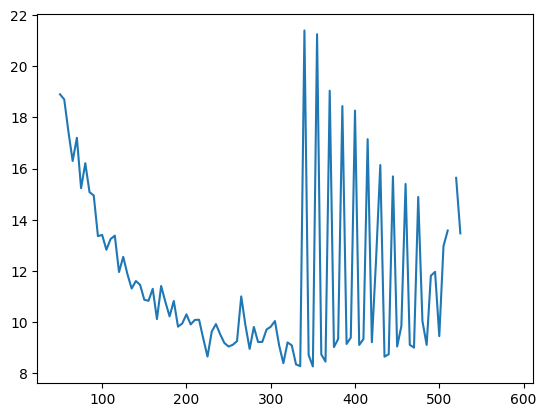

In [340]:
Bin_final=np.transpose(Bin_results)
sig_array,N_array,P_array,BG_array,T_array,D_array,Chi_array=Bin_final


plt.plot(nbins_array,Chi_array/nbins_array)
np.argmax(Chi_array/nbins_array)


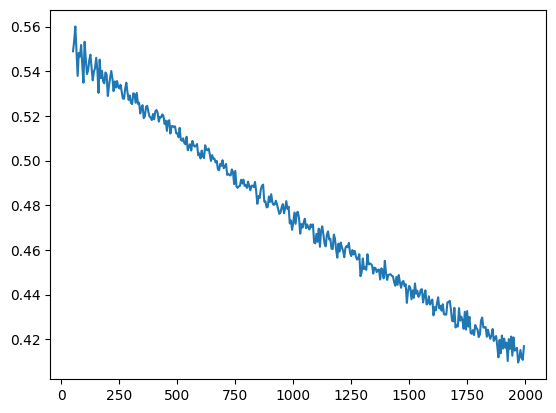

In [282]:
plt.plot(nbins_array,BG_array/D_array)

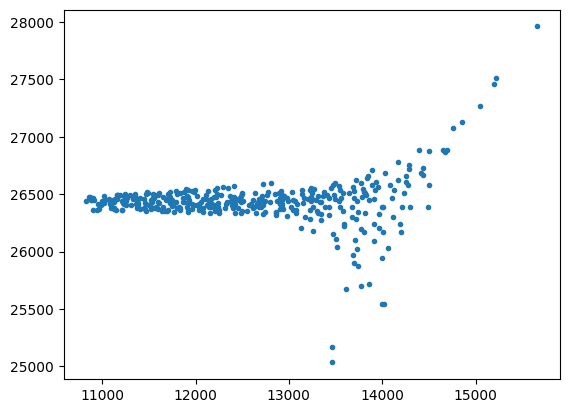

In [297]:
plt.plot(BG_array,D_array,'.')

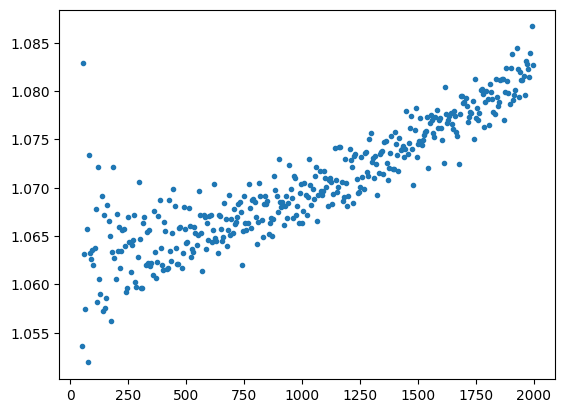

In [300]:
plt.plot(nbins_array,(D_array-N_array)/BG_array,'.')

In [329]:
np.mean(Chi_array/nbins_array)

nan

In [342]:
newChi = Chi_array[~(np.isnan(Chi_array) | np.isinf(Chi_array))]
newBins=nbins_array[~(np.isnan(Chi_array) | np.isinf(Chi_array))]

Text(0, 0.5, 'Everything is Normalized to itself')

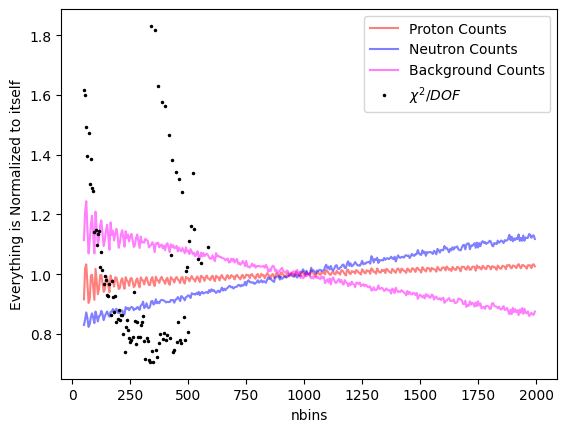

In [356]:

plt.plot(nbins_array,P_array/np.mean(P_array),alpha=.5,color='red',label='Proton Counts')
plt.plot(nbins_array,N_array/np.mean(N_array),alpha=.5,color='blue',label='Neutron Counts')
plt.plot(nbins_array,BG_array/np.mean(BG_array),alpha=.5,color='magenta',label='Background Counts')
plt.plot(newBins,(newChi/newBins)/np.mean(newChi/newBins),'.',markersize=3,color='black',label="$\chi^2 / DOF$")
plt.legend(loc='upper right')
plt.xlabel('nbins')
plt.ylabel('Everything is Normalized to itself')




In [361]:
print(np.argmin(newChi/newBins))
newBins[60]

60


350

# Significance


##### Here we find the significance, $\frac{S}{\sqrt(S+B)}$, for varying cut values. We inspect the significance for combinations of W2, dy, dybg, and dx. For each combination the dx histogram is fit to simulation. The error and statistics are also considered

In [198]:
#_____________Cuts____________________
W2min=CONFIG.Function_JSON("W2min",f"../config/cuts{config}.cfg")
W2max=CONFIG.Function_JSON("W2max",f"../config/cuts{config}.cfg")
dxmin=CONFIG.Function_JSON("dxmin",f"../config/cuts{config}.cfg")
dxmax=CONFIG.Function_JSON("dxmax",f"../config/cuts{config}.cfg")
dymin=CONFIG.Function_JSON("dymin",f"../config/cuts{config}.cfg")
dymax=CONFIG.Function_JSON("dymax",f"../config/cuts{config}.cfg")
dybgmin=CONFIG.Function_JSON("dybgmin",f"../config/cuts{config}.cfg")
dybgmax=CONFIG.Function_JSON("dybgmax",f"../config/cuts{config}.cfg")
coinmin=CONFIG.Function_JSON("coinmin",f"../config/cuts{config}.cfg")
coinmax=CONFIG.Function_JSON("coinmax",f"../config/cuts{config}.cfg")



granularity=10 # number of values for each cut

dxtop=1

dytop=1.6
dybgtop=2.5
w2top=2


dxstart=.2
dystart=.2
dybgstart=1
w2start=.4

scaler = np.arange(1,granularity)
dx_array=np.array(dxstart)
dy_array=np.array(dystart)
dybg_array=np.array(dybgstart)
w2_array=np.array(w2start)

for i in range(0,len(scaler)):
    dx_array=np.append(dx_array,dxstart+(dxtop-dxstart)*scaler[i]/len(scaler))
    dy_array=np.append(dy_array,dystart+(dytop-dystart)*scaler[i]/len(scaler))
    dybg_array=np.append(dybg_array,dybgstart+(dybgtop-dybgstart)*scaler[i]/len(scaler))    
    w2_array=np.append(w2_array,w2start+(W2top-w2start)*scaler[i]/len(scaler))
    
#_____________Cut Combinations____________________
cut_combinations = [( dy_value, dybg_value, w2_value) for dy_value in dy_array for dybg_value in dybg_array for w2_value in w2_array]

len(cut_combinations)



1000

In [199]:
len(cut_combinations)*.5/60/16

0.5208333333333334

In [200]:
def CalculateSignificance(dy_value,dybg_value,w2_value,config):
    
    W2min=CONFIG.Function_JSON("W2min",f"../config/cuts{config}.cfg")
    W2max=CONFIG.Function_JSON("W2max",f"../config/cuts{config}.cfg")
    dxmin=CONFIG.Function_JSON("dxmin",f"../config/cuts{config}.cfg")
    dxmax=CONFIG.Function_JSON("dxmax",f"../config/cuts{config}.cfg")
    dymin=CONFIG.Function_JSON("dymin",f"../config/cuts{config}.cfg")
    dymax=CONFIG.Function_JSON("dymax",f"../config/cuts{config}.cfg")
    dybgmin=CONFIG.Function_JSON("dybgmin",f"../config/cuts{config}.cfg")
    dybgmax=CONFIG.Function_JSON("dybgmax",f"../config/cuts{config}.cfg")
    coinmin=CONFIG.Function_JSON("coinmin",f"../config/cuts{config}.cfg")
    coinmax=CONFIG.Function_JSON("coinmax",f"../config/cuts{config}.cfg")
#=========================================standard root stuff================================================    
    r.gErrorIgnoreLevel = r.kError  # Suppress Info and Warning messages
    gStyle.SetOptStat(0)
    gStyle.SetOptFit(1)

    rootfilenp = (f"../outfiles/Pass1/QE_data_GEN{config}_sbs100p_nucleon_np_model2.root")
    rootfilep = (f"../outfiles/Pass1/QE_sim_GEN{config}_sbs100p_nucleon_np_model2.root")
    if config == "4":
        config = "4b"
    
    C = TChain("Tout")
    B = TChain("Tout")
    
    C.Add(rootfilenp)
    B.Add(rootfilep)

    dx_p, dy_p, W2_p, coin_p,fnucl  = array.array('d', [0]),array.array('d', [0]), array.array('d', [0]), array.array('d', [0]), array.array('d', [0])
    dx_np, dy_np, W2_np, coin_np, weight = array.array('d', [0]), array.array('d', [0]), array.array('d', [0]), array.array('d', [0]), array.array('d', [0])
    helicity_p, IHWP_p, runnum_p = array.array('i', [0]), array.array('i', [0]), array.array('i', [0])
    helicity_np, IHWP_np, runnum_np= array.array('i', [0]), array.array('i', [0]), array.array('i', [0])
    
    # Disable all branches initially
    C.SetBranchStatus("*", 0)
    B.SetBranchStatus("*", 0)

    # Enable specific branches
    branches = ["dx", "dy", "W2", "helicity", "IHWP", "runnum", "coinCut", "coin_time"]
    b2=["dx", "dy", "W2"]
    for branch in branches:
        C.SetBranchStatus(branch, 1)
    for branch in b2:
        B.SetBranchStatus(branch, 1)

    B.SetBranchStatus("weight", 1)
    B.SetBranchStatus("fnucl",1)
    # Set branch addresses
    C.SetBranchAddress("dx", dx_np)
    B.SetBranchAddress("dx", dx_p)
    C.SetBranchAddress("dy", dy_np)
    B.SetBranchAddress("dy", dy_p)
    C.SetBranchAddress("W2", W2_np)
    B.SetBranchAddress("W2", W2_p)
    C.SetBranchAddress("helicity", helicity_np)
    #B.SetBranchAddress("helicity", helicity_p)
    C.SetBranchAddress("IHWP", IHWP_np)
    #B.SetBranchAddress("IHWP", IHWP_p)
    C.SetBranchAddress("coin_time", coin_np)
    #B.SetBranchAddress("coin_time", coin_pp)
    C.SetBranchAddress("runnum", runnum_np)
    #B.SetBranchAddress("runnum", runnum_p)
    B.SetBranchAddress("weight", weight)
    B.SetBranchAddress("fnucl", fnucl)
    
    # Assuming the variables are already defined or loaded from the ROOT file
    
    nbins = 100
    xmin, xmax = -4, 2.5
    if config=="2":
        xmin=-5.5
        xmax=2.8
    
    hdx_total_data = TH1F("hdx_total_data", "#Deltax;#Deltax;Entries", nbins, xmin, xmax)
    hdx_total_sim = TH1F("hdx_total_sim", "#Deltax;#Deltax;Entries", 100, -6, 4)
    hdx_p = TH1F("hdx_p", "#Deltax for helicity +1;#Deltax;Entries", 100, -6, 4)
    hdx_m = TH1F("hdx_m", "#Deltax for helicity -1;#Deltax;Entries", 100, -6, 4)
    
    hdx_data_plus = TH1F("hdx_data_plus", "", nbins, xmin, xmax)
    hdx_data_minus = TH1F("hdx_data_minus", "", nbins, xmin, xmax)
    hdx_sim_p = TH1F("hdx_sim_p", "", nbins, xmin, xmax)
    hdx_sim_n = TH1F("hdx_sim_n", "", nbins, xmin, xmax)
    hdx_bg_data = TH1F("hdx_bg_data", "", nbins, xmin, xmax)
    hdx_bg_data_plus = TH1F("hdx_bg_data_plus", "", nbins, xmin, xmax)
    hdx_bg_data_minus = TH1F("hdx_bg_data_minus", "", nbins, xmin, xmax)
 #====================================================================================================   

    nEntries_np = C.GetEntries()
    for i in range(nEntries_np):
        C.GetEntry(i)
        if IHWP_np[0] == 1:
            helicity_np[0] *= -1
        elif IHWP_np[0] == -1:
            helicity_np[0] *= 1
        else:
            continue
        #___________________________Cuts_________
        coin_cut = coinmin < coin_np[0] < coinmax
        ycut=abs(dy_np[0])<dy_value
        bgycut=abs(dy_np[0])<dybg_value
        W2cut=W2min<W2_np[0]<w2_value
        #___________________________Cuts_________
        if coin_cut and W2cut and runnum_np[0] > 2165 and not bgycut:
            hdx_bg_data.Fill(dx_np[0])
            if helicity_np[0] == 1:
                hdx_bg_data_plus.Fill(dx_np[0])
            if helicity_np[0] == -1:
                hdx_bg_data_minus.Fill(dx_np[0])
        
        if coin_cut and W2cut and runnum_np[0] > 2165 and ycut:
            hdx_total_data.Fill(dx_np[0])
            if helicity_np[0] == 1:
                hdx_data_plus.Fill(dx_np[0])
            if helicity_np[0] == -1:
                hdx_data_minus.Fill(dx_np[0])
    
    # Simulation loop
    nEntries_p = B.GetEntries()
    
    for i in range(nEntries_p):
        B.GetEntry(i)
           
        #____________CUTS_______________________________      
        ycut = dymin < dy_p[0] < dymax
        W2cut=W2min < W2_p[0] < W2max
        #________________________________________________ 

        if W2cut and ycut and fnucl[0]==1:
            hdx_sim_p.Fill(dx_p[0], weight[0])
        if W2cut and ycut and fnucl[0]==0:
            hdx_sim_n.Fill(dx_p[0], weight[0])
    
    

    # Fit distributions
    cfg = f"GEN{config}"
    dists = DistributionFits(bg_shape_option="pol2" if cfg == "GEN2" else "from data")
    dists.hdx_data = (np.array([hdx_total_data.GetBinCenter(i) for i in range(1, hdx_total_data.GetNbinsX() + 1)]), 
                      np.array([hdx_total_data.GetBinContent(i) for i in range(1, hdx_total_data.GetNbinsX() + 1)]))
    dists.hdx_sim_p = (np.array([hdx_sim_p.GetBinCenter(i) for i in range(1, hdx_sim_p.GetNbinsX() + 1)]), 
                       np.array([hdx_sim_p.GetBinContent(i) for i in range(1, hdx_sim_p.GetNbinsX() + 1)]))
    dists.hdx_sim_n = (np.array([hdx_sim_n.GetBinCenter(i) for i in range(1, hdx_sim_n.GetNbinsX() + 1)]), 
                       np.array([hdx_sim_n.GetBinContent(i) for i in range(1, hdx_sim_n.GetNbinsX() + 1)]))
    dists.hdx_bg_data = (np.array([hdx_bg_data.GetBinCenter(i) for i in range(1, hdx_bg_data.GetNbinsX() + 1)]), 
                         np.array([hdx_bg_data.GetBinContent(i) for i in range(1, hdx_bg_data.GetNbinsX() + 1)]))

    hdx_bg_fit, hdx_total_fit, hdx_sim_p, hdx_sim_n = dists.He3_fit_dists()

    # Plot results
    hdx_data_plot = hdx_total_data.Clone("hdx_data_plot")
    #hdx_sim_p_plot = hdx_sim_p.Clone("hdx_sim_p_plot")
    #hdx_sim_n_plot = hdx_sim_n.Clone("hdx_sim_n_plot")
    hdx_sim_p_plot = TH1F("hdx_sim_p_plot", "", nbins, xmin, xmax)
    hdx_sim_n_plot = TH1F("hdx_sim_n_plot", "", nbins, xmin, xmax)
    hdx_bg_plot = TH1F("hdx_bg_plot", "", nbins, xmin, xmax)
    hdx_total_fit_plot = TH1F("hdx_total_fit_plot", "", nbins, xmin, xmax)

    for i in range(nbins):
        hdx_bg_plot.SetBinContent(i + 1, hdx_bg_fit[i])
        hdx_total_fit_plot.SetBinContent(i + 1, hdx_total_fit[i])
        hdx_sim_p_plot.SetBinContent(i + 1, hdx_sim_p[i])
        hdx_sim_n_plot.SetBinContent(i + 1, hdx_sim_n[i])

        
    totalHist=Function_HIST2NP(hdx_data_plot)
    bgHist=Function_HIST2NP(hdx_bg_plot)
    simpHist=Function_HIST2NP(hdx_sim_p_plot)
    simnHist=Function_HIST2NP(hdx_sim_n_plot)
        
    #========================Calculate yields==================
    lower_bound = dxmin
    upper_bound = dxmax

    bin_centers,bin_contents=bgHist
    numBG=np.sum(bin_contents[(bin_centers >= lower_bound) & (bin_centers <= upper_bound)])

    bin_centers,bin_contents=simpHist
    numProton=np.sum(bin_contents[(bin_centers >= lower_bound) & (bin_centers <= upper_bound)])

    bin_centers,bin_contents=simnHist
    numNeutron=np.sum(bin_contents[(bin_centers >= lower_bound) & (bin_centers <= upper_bound)])

    bin_centers,bin_contents=totalHist
    numTotal=np.sum(bin_contents[(bin_centers >= lower_bound) & (bin_centers <= upper_bound)])

    #___________________________________________________________________________

    significance=numNeutron/np.sqrt(numNeutron+numBG)
    
  
    return significance, numNeutron, numBG, (dy_value, dybg_value, w2_value)        
        

In [202]:
config

'3'

In [250]:
%%time
n_jobs = -1  # Use all available CPU cores
Sigresults = Parallel(n_jobs=n_jobs)(delayed(CalculateSignificance)(dy_value, dybg_value, w2_value, config) for (dy_value, dybg_value, w2_value) in cut_combinations)



KeyboardInterrupt: 

Error in <TList::Clear>: A list is accessing an object (0x7270260) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x72a6770) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x72a69b0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x72a6bc0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x72a6f30) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x72a72a0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x72a7700) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x72a7ac0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x75eba20) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x75ebe10) alread

In [204]:
final=np.transpose(Sigresults)

In [205]:
np.save(f'SIGNIFICANCE/GEN{config}/Pass{pas}/SignificanceArray.npy',final)

In [214]:
np.argmax(final[0])

999

In [215]:
final[-1][999]

(1.6, 2.5, 2.0)

In [208]:
cutnumber=np.arange(1,len(final[0])+1)

In [209]:
len(cutnumber)

1000

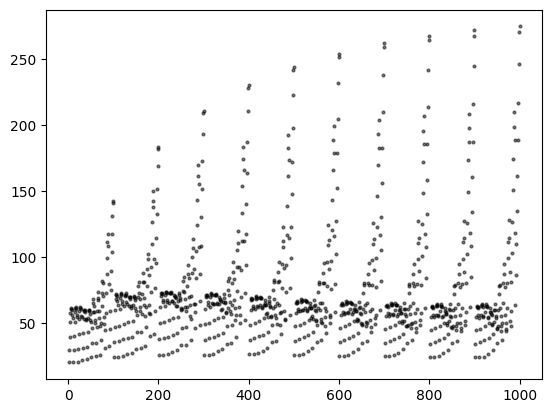

In [210]:
plt.plot(cutnumber,final[0],'.',markersize=4,color='black',alpha=.5)

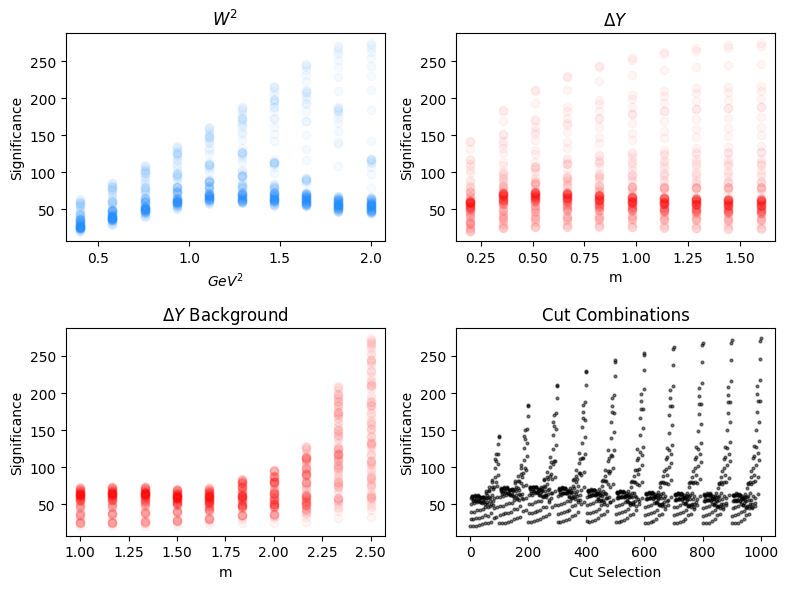

In [211]:
cut_values=final[-1]
sigs=final[0]
dy_values = [cut[0] for cut in cut_values]
dybg_values = [cut[1] for cut in cut_values]
w2_values = [cut[2] for cut in cut_values]

plt.figure(figsize=(8, 6))

plt.subplot(2, 2, 1)
plt.title("$W^2$")
plt.ylabel("Significance")
plt.xlabel("$GeV^2$")
plt.scatter(w2_values, sigs,alpha=0.04,color='dodgerblue')
plt.subplot(2, 2, 2)
plt.title("$\Delta Y$")
plt.ylabel("Significance")
plt.xlabel("m")
plt.scatter(dy_values, sigs,alpha=0.04,color='red')
plt.subplot(2, 2, 3)
plt.title("$\Delta Y$ Background")
plt.ylabel("Significance")
plt.xlabel("m")
plt.scatter(dybg_values, sigs,alpha=0.04,color='red')
plt.subplot(2,2,4)
plt.title("Cut Combinations")
plt.ylabel("Significance")
plt.xlabel("Cut Selection")
plt.plot(cutnumber,final[0],'.',markersize=4,color='black',alpha=.5)
plt.tight_layout()

